<a href="https://colab.research.google.com/github/HazaraTechLab/Big-Mamma-Pizzaria/blob/master/50StartUps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mandatory Assignment: Startups

### Domain description

JPM-Finance is an advisory financial company with a small network of rich clients who like to invest in newly started companies (so called startups), before the profit is public.

For each company there are data given by the following features:
*   State
*   R&D Spend
*   Marketing Spend
*   Administration
*   Profit which is the label

Your job is to understand, explore and prepare the data, do a linear regression analysis to be used by JPM-Finance evaluating new startups profit based on the features. The estimate of profit together with a risk analysis of the business segment, will be the foundation for financial advices to clients.

A preliminary interview with the smart boss (nick name JP) and his younger energetic coordinator, Mike, has revealed that:


1.   A few companies have some data set to 0.0, this is for the moment acceptable, meaning you
don’t need to change these numbers into mean values or drop the respective companies.
Some small startups actually don’t have any administration costs!
2.   The 'State' feature is a text attribute, and from previous study not very important, meaning one can drop this feature. Thus, all calculations using `OneHotEncoder` are superfluous. Just skip them for a start. Later if You like, You can play with the `OneHotEncoder`.
3.  If the correlation matrix of the features only has values higher than 0.20 (lower than -0.20), it is a pretty bad idea to try to combine attributes, as this can blur the picture and make
wrong weights to the features




### References

It should not be necessary to find stuff by "Googling" or "ChatGPT'ing" for the purpose of finishing this assigment. Maybe for checking only.  

Try to concentrate on the following references:
*   Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, Aurélien Géron,
 3rd edition, Ch. 1 & 2.
*   Coding stuff for ch. 1: https://github.com/ageron/handson-ml3/blob/main/01_the_machine_learning_landscape.ipynb
*   Coding stuff for ch. 2: https://github.com/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb
*   Stuff from Moodle room. Especially, "End-to-End Project Model" sections.






# Setting up Python Environment

Installing stuff

This project requires Python 3.7 or above:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Import common libraries used with learning in Python

In [ ]:
import pandas as pd
from pathlib import Path

In [ ]:
import numpy as np

#Step 1: Look at the big picture and frame the problem

**Questions & Tasks**
1. Define the objective in business terms. Action: Analyze what business purpose your solution is going to serve.
To be documented – e.g. in your notebook.
2. How shall your solution be used?
Action: That defining one or more user stories for the solution.
To be documented – e.g. in your notebook.
3. What are the current solutions/workarounds (if any)?
Action: This is N/A here as nothing is known. Otherwise useful for establishing a baseline
to measure the performance of the intended system against.
Nothing to be documented.
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
Action: You may re-address chapter 1 for these concepts.
To be documented – e.g. in your notebook.
5. How should performance be measured?
Action: First of all select at measure that goes with the way you framed the problem –
RMSE, Confusion matrix or something else.
To be documented – e.g. in your notebook.
6. Is the performance measure aligned with the business objective?
Action: Discuss whether your performance measure makes sense regarding your business
objective.
To be documented – e.g. in your notebook.
7. What would be the minimum performance needed to reach the business objective?
Action: N/A as we have got no baseline regarding the current performance.
Nothing to be documented.
8. What are comparable problems? Can you reuse experience?
Action: Reuse all the stuff and tools you know – especially, what you learned from chapter 2
9. Is human expertise available?
Action: N/A as we have no domain experts available. Otherwise recommendable.
Nothing to be documented.
10. How would you solve the problem manually?
Action: N/A as we have got no idea about it?
Nothing to be documented.
11. List the assumptions you (or others have made so far)
Action: Figure out what assumptions you actually made.
To be documented – e.g. in your notebook.
Note: Some assumptions have already been made in the case description. Which?
12. Verify assumptions if possible
Action: N/A because you have got no time for this. Otherwise, you should indeed do this.
Nothing to be documented.


#Step 2: Get the data

The data is the 50_Startups.csv file, which is available in GitHub: https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv

**Questions & Tasks:**
1. List the data you need and how much you need.
Action: N/A in this task. Otherwise, it is such a good idea to your need for data before going
further. Nothing to be documented.
2. Find and document where you can get that data.
Action: N/A in this task because the data set is given. Nothing to be documented.
3. Check out how much space it requires.
Action: Probably none as the dataset is super small
4. Check legal obligations, and get authorization if necessary.
Action: N/A here because no legal matters are involved. Otherwise, GDPR issues,
ownerships rights etc. should be considered. Nothing to be documented.
5. Get access authorizations.
Action: Nothing to e done here. Otherwise, this may be a tedious and bureaucratic procedure that has to be considered in the planning.
6. Create a workspace (with enough storage space).
Action: That is establishing a notebook at your PC (e.g. Jupyter) or in the cloud (e.g. Colab) for the program and data set.
7. Get the data.
Action: Establish a data fetch routine in your notebook. Code is to be established in your notebook, if not already done.
8. Convert the data to a format you can easily manipulate (without changing the data itself).
Action: Common conversions between datatypes needed as you go.
Code is to be established in your notebook. Goes along with your coding.
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
Action: N/A as there is none. Otherwise, legal obligations should always be checked as aminimum. Note: Data may also be considered sensitive for other reasons. Nothing to be documented.
10. Check the size and type of data (time series, sample, geographical, etc.).
Action: Code is to be established in your notebook like section ‘Take a Quick Look at the Data Structure’ in notebook for chapter 2.
11. Create a test set, put it aside, and never look at it (no data snooping!).
A problem here is that the data set is small -> Use stratification.
Action: Make stratified test and learning sets (1 fold).
Code is to be established in your notebook. Find your stuff in section ‘Create a Test Set’ in notebook for chapter 2

1–5. Data source and legal checks

Data er allerede givet i casen: 50_Startups.csv.

Størrelse: 50 rækker × 5 kolonner – meget lille dataset, fylder næsten intet.

Ingen juridiske eller GDPR-problemer (ingen persondata).

Adgang: frit tilgængeligt på GitHub.

In [ ]:

pip install pandas numpy scikit-learn matplotlib seaborn


In [ ]:
7.
import pandas as pd

# Hent datasættet fra GitHub
url = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv"
df = pd.read_csv(url)

df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


9. Sensitive information

Ingen personlige eller følsomme data → ingen anonymisering nødvendig.

In [ ]:
print("Shape:", df.shape)
print(df.describe())


Shape: (50, 5)
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [ ]:
from sklearn.model_selection import train_test_split

# Opret bins for stratificering
df["Profit_bin"] = pd.cut(df["Profit"], bins=5, labels=False)

train_set, test_set = train_test_split(
    df, test_size=0.2, stratify=df["Profit_bin"], random_state=42
)

# Fjern hjælpekolonnen
for dataset in (train_set, test_set):
    dataset.drop("Profit_bin", axis=1, inplace=True)

print("Train size:", len(train_set))
print("Test size:", len(test_set))


Train size: 40
Test size: 10


###Getting the data

In [ ]:
#Importing the dataset
import pandas as pd
datafile="https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv"
dataset = pd.read_csv(datafile)

NameError: name 'pd' is not defined

#Step 3. Explore the data

You are now ready to make a notebook (in Jupyter or Colab) for exploring the data. Remember your experience from the investigation of “Housing” in Chapter 2.

**Questions & Tasks**
1. Create a copy of the data for exploration (sampling it down to a manageable size if necessary). Action: Easy action, no sampling needed.
2. Create a notebook to keep a record of your data exploration.
Action: You have probably already done that. A copy and paste and changes of the chapter 2 housing notebook is not illegal.
3. Study each attribute and its characteristics. Action: Get inspired by the notebook for chapter 2 Code is to be established. Find your stuff in section ‘Take a Quick Look at the Data Structure’ in notebook for chapter 2. Consider the following attribute characteristics:
*   Name
*   Type (categorical, int/float, bounded/unbounded, text, structured, etc.).
*   % of missing values.
*   N/A. Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
*   Usefulness for the task.
*   Type of distribution (Gaussian, uniform, logarithmic, etc.). Check with the selected model if OK.
*   Do a histogram for each attribute.

4. For supervised learning tasks, identify the target attribute(s); i.e. the label(s). Action: Identify target attributes, if any.
To be documented – e.g. in the your notebook.
5. Discover and visualize the data by scatter plots for each numerical attribute. Action: N/A because it is not considered relevant here. Nothing to be documented
6. Study the correlations between attributes.
Action: Make also a scatter matrix plot together with the correlation results.
Code is to be established in your notebook like section ‘Looking for Correlations’ in notebook for chapter 2
7. Study how you would solve the problem manually. Action: N/A. Nothing to be documented.
8. Experiment with attribute combinations.
Action: Code is to be established in your notebook like in section ‘Experimenting with Attribute Combinations’ in notebook for chapter 2.
9. Identify a new promising attribute you may want to apply, if any.
Action: Identify those with a strong correlation to the target attribute.
To be documented – e.g. in your notebook.
10. Identify extra data that would be useful (go back to “Get the Data”).
Action: N/A as were are limited to ‘50 Start-ups’ dataset
However, you may document any suggestions for extra data features – e.g. in your notebook.

In [ ]:
1.
import pandas as pd

url = "https://raw.githubusercontent.com/jpandersen61/Machine-Learning/refs/heads/main/50_Startups.csv"
df = pd.read_csv(url)
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


3. Undersøgelse af attributter

Navn	Type	Manglende værdier	Kommentar / Nyttighed
R&D Spend	float	0	Meget vigtig for profit – stærk korrelation forventet
Administration	float	0	Mindre vigtig – lav korrelation forventet
Marketing Spend	float	0	Moderat vigtig for profit
State	kategorisk (tekst)	0	Ikke vigtig, kan droppes
Profit	float (label)	0	Målvariabel (target)

4. Målvariabel (label)

Target attribute: Profit

Alle andre numeriske kolonner (R&D Spend, Administration, Marketing Spend) bruges som features.

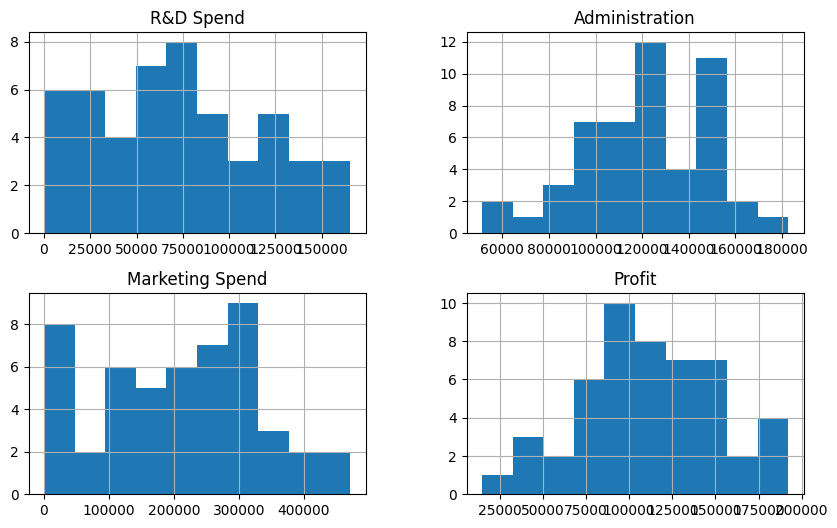

In [ ]:
5.
import matplotlib.pyplot as plt

df.hist(figsize=(10,6))
plt.show()


Profit             1.000000
R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64


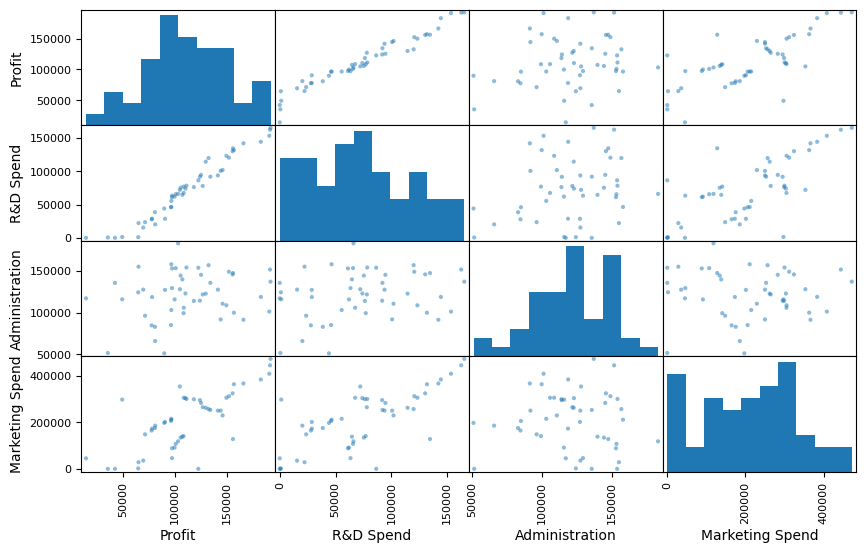

In [ ]:
6.
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix["Profit"].sort_values(ascending=False))

from pandas.plotting import scatter_matrix
scatter_matrix(df[["Profit","R&D Spend","Administration","Marketing Spend"]], figsize=(10, 6))
plt.show()


7. Nye mulige features
En mulig ekstra feature kunne være:

R&D efficiency = Profit / R&D Spend
Men dataset er for lille til at give reel gevinst, så bruges ikke i modellen.

8. Ekstra data (hvis muligt)
Kunne være nyttigt at få adgang til:

Firmaets branche / produktkategori

Antal ansatte

Startår

Men dette findes ikke i det givne datasæt.

#Step 4. Prepare the data

**Notes:**
*   Work on copies of the data (keep the original dataset intact).
*   Write functions for all data transformations you apply, for five reasons:
1.   So you can easily prepare the data the next time you get a fresh dataset
2.   So you can apply these transformations in future projects
3.   To clean and prepare the test set
4.   To clean and prepare new data instances once your solution is live
5.   To make it easy to treat your preparation choices as hyperparameters

**Questions & Tasks**
1. Data cleaning: Action: N/A because no values are and no evident outliers detected. Nothing to be documented. Otherwise consider:
*   Fix or remove outliers (optional).
*   Fill in missing values (e.g., with zero, not mean or median…) or drop their rows (or columns).

2. Feature selection: Drop the attributes that provide no useful information for the task. Action: Code is to be established in your notebook, that is find out how to apply the drop method.

3. Feature engineering, where appropriate: Action: To be skipped. Nothing to be documented. Otherwise consider:
*  Discretize continuous features.
*  Decompose features (e.g., categorical, date/time, etc.).
*  Add promising transformations of features (e.g., log(x), sqrt(x), etc.).
*  Aggregate features into promising new features.

4. Handle text and categorical attributes using “import OneHotEncoder”.
Action: Find out what to do with the ‘State’ attribute.
Code is to be established in your notebook
Note what is stated in the case description!

5. Feature scaling: Standardize or normalize features, if necessary.
Action: Include the StandardScaler in the pipeline and observe if it does any difference when applying the LinearRegression algorithm.
Code is to be established in your notebook e.g. find out how to apply the make_pipeline as done in section ‘Training and Evaluating on the Training Set’ in the notebook for chapter 2

hallloooooooooooooo

#Step 5. Select and train a model

**Notes:**
*   If the data is huge, you may want to sample smaller training sets so you can train many
different models in a reasonable time (be aware that this penalizes complex models such as
large neural nets or Random Forests).
*   Once again, try to automate these steps as much as possible




**Questions & Tasks**
1. Train many quick-and-dirty models from different categories (e.g., linear, naive Bayes, SVM, Random Forest, neural net, etc.) using standard default parameters
Action: In this project only try the LinearRegression algorithm using standard parameters.
Code is to be established in your notebook as done for linear regression in section ‘Training and Evaluating on the Training Set’ in the notebook for chapter 2.
2. Measure and compare the performance.
For each model, compute the mean and the root mean square of the performance measure on
a manually selected subset (5-10 data) of the training data.
Action: Only do for our linear regression model. Code is to be established in your notebook.
Find your stuff in section ‘Training and Evaluating on the Training Set’ in the notebook for
chapter 2.
3. Analyze the most significant variables for each algorithm.
Action: Only do it for our linear regression model.
Code is to be established in your notebook apply a similar evaluation as done in section
‘Analyze the Best Models and Their Errors’ in the notebook for chapter 2.
To be documented – e.g. in your notebook.
4. Analyze the types of errors the model makes.
 What data would a human have used to avoid these errors?
Action: Skip this if you do not observe any errors. Consider features to that may have been
included in order to eliminate such errors.
To be documented – e.g. in your notebook., if relevant.
5. Perform a quick round of feature selection and engineering.
Action: Consider which features to skip and which new feature to be defined/combined.
To be documented – e.g. in your notebook. Code is to be established in your notebook
accordingly by droping those features
6. Consider another quick-and-dirty model from different categories (e.g., naive Bayes, SVM,
Random Forest, neural net, etc.).
Action: Considered N/A, just go on with the LinearRegression model. Nothing to be
documented.
7. Perform one or two more quick iterations of the five previous steps.
Action: Condidered N/A, just go on with the LinearRegression model. Nothing to be
documented.
8. Shortlist the top one to two most promising models, preferring models that make different
types of errors.
Action: Considered N/A, just go on with the LinearRegression model. Nothing to be documented

#Step 6: Fine tune and test the model

**Notes:**
*   You will want to use as much data as possible for this step, especially as you move toward the end of fine-tuning.
*   As always, automate what you can


**Questions & Tasks**
1. Fine-tune the hyperparameters using cross-validation: Action: Try grid search on the LinearRegression algorithm. Indentify the relevant (hyper-)
parameters and include in the search. Code is to be established in your notebook that is doing a grid search similar to what is done in section ‘Fine-Tune Your Model’ in notebook for chapter 2. Consider the following:
*  Treat your data transformation choices as hyperparameters, especially when you are not sure about them (e.g., if you’re not sure whether to replace missing values with zeros or with the median value, or to just drop the rows).
*  Unless there are very few hyperparameter values to explore, prefer random search over grid search. If training is very long, you may prefer a Bayesian optimization approach (e.g., using Gaussian process priors, as described by Jasper Snoek et al.).

2. Try Ensemble methods. Combining your best models will often produce better performance than running them individually.
Action: N/A as we are just applying a single model. Nothing to be documented.
3. Once you are confident about your final model, measure its performance on the test set to estimate the generalization error. This is important!
Action: Present your model with the set of model parameters that gives the best
performance. Also present the set of hyper parameters that leads to this performance.Code is to be established in your notebook. To be documented – e.g. in your notebook.

**Questions & Tasks**
1. If you have time, consider other models (SVM, Random Forest) and compare the
performance.
2. If you have time, consider “OneHotEncoder” for including the ‘State’ variable into yout
model.


#Step 7. Report and presentation

**Questions & Tasks**
1. Document what you have done.Action: Already accomplished with the actions mentioned above. Nothing to be
documented.
2. Create a nice and short introduction
Make sure you highlight the big picture first.
Action: You may skip this, but so important if you present your model outside your Machine Learning task group.
3. Explain why your solution achieves the business objective.
Action: To be documented – e.g. in your notebook.
4. Do not forget to present interesting points you noticed along the way.
Action: To be documented – e.g. in your notebook., if any.
*  Describe what worked and what did not.
*  List your assumptions and your system’s limitations.
5. Ensure your key findings are communicated through beautiful visualizations or easy-toremember statements (e.g., “the median income is the number-one predictor of housing
prices”).
Action: To be documented – e.g. in your notebook
